In [95]:
import yfinance as yf

# Fetch Tesla stock data
tesla = yf.download('TSLA', start='2010-01-01', end='2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [96]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tesla['Close'].values.reshape(-1, 1))

In [97]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [98]:
import numpy as np

In [99]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [101]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
79/79 [==============================] - 2s 6ms/step - loss: 1.7701e-04
Epoch 2/50
79/79 [==============================] - 0s 5ms/step - loss: 1.1786e-05
Epoch 3/50
79/79 [==============================] - 0s 5ms/step - loss: 1.1778e-05
Epoch 4/50
79/79 [==============================] - 0s 6ms/step - loss: 1.2230e-05
Epoch 5/50
79/79 [==============================] - 0s 5ms/step - loss: 1.1266e-05
Epoch 6/50
79/79 [==============================] - 0s 5ms/step - loss: 1.2373e-05
Epoch 7/50
79/79 [==============================] - 0s 5ms/step - loss: 1.0419e-05
Epoch 8/50
79/79 [==============================] - 0s 5ms/step - loss: 1.0217e-05
Epoch 9/50
79/79 [==============================] - 0s 6ms/step - loss: 1.0929e-05
Epoch 10/50
79/79 [==============================] - 0s 6ms/step - loss: 1.0228e-05
Epoch 11/50
79/79 [==============================] - 0s 5ms/step - loss: 1.0341e-05
Epoch 12/50
79/79 [==============================] - 0s 6ms/step - loss: 1.0283e-05
E

In [102]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

20/20 [==============================] - 0s 2ms/step


In [103]:
import matplotlib.pyplot as plt

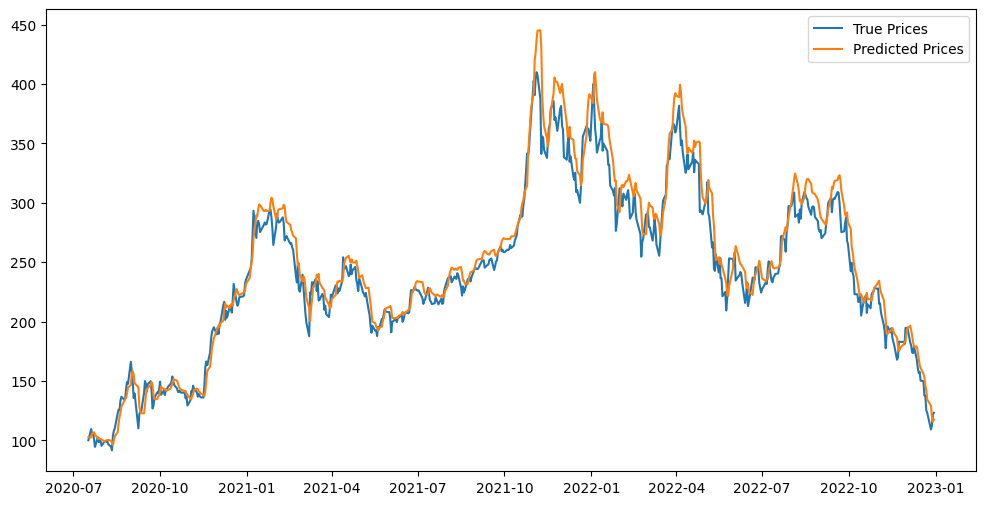

In [104]:
plt.figure(figsize=(12, 6))
plt.plot(tesla.index[train_size + sequence_length:], tesla['Close'][train_size + sequence_length:], label='True Prices')
plt.plot(tesla.index[train_size + sequence_length:], predictions, label='Predicted Prices')
plt.legend()
plt.show()